In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E18B38A358>,
      dtype=object)

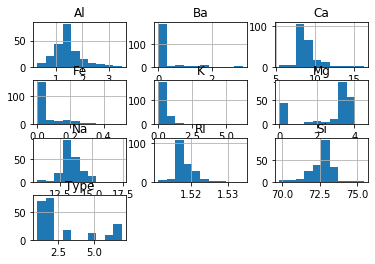

In [5]:
df.hist()

In [8]:
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [9]:
X = df.drop('Type',axis=1)
X.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [10]:
Y = df.iloc[:,-1]
Y.head(2)

0    1
1    1
Name: Type, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [13]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [14]:
# K = 3 -> Initiating the Learning Model
neigh = KNeighborsClassifier(n_neighbors=3)

In [15]:
# Fit the Learning model to the training data
neigh.fit(X_Train, Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
# Predict the Test Set Results
Y_Predict = neigh.predict(X_Test)
Y_Predict


array([7, 1, 2, 6, 5, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 7, 1, 2, 1, 1, 5, 1,
       7, 1, 1, 1, 7, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 7, 2, 7, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 6, 7, 1], dtype=int64)

In [17]:
# Accuracy score
Conf_Mat = confusion_matrix(Y_Test, Y_Predict)
Conf_Mat


array([[10,  3,  1,  0,  0,  0],
       [ 8, 15,  0,  0,  1,  0],
       [ 5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  6]], dtype=int64)

In [18]:
acc = accuracy_score(Y_Test, Y_Predict)*100
print("Accuracy of our model = "+ str(round(acc,2))+"%")

Accuracy of our model = 62.96%


In [19]:
K_values = list(range(1,10,2))
K_values

[1, 3, 5, 7, 9]

In [20]:
# Create Cross-Validation scores
cv = []
cv_scores = []


In [21]:
# perform 10 cross_validation
for k in K_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    print(knn)
    score = cross_val_score(knn, X_Train,Y_Train, cv = 10, scoring = 'accuracy')
    cv_scores.append(score.mean())


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


C:\Users\karale_M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\karale_M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


C:\Users\karale_M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


C:\Users\karale_M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\karale_M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [22]:
# Misclassification Errors (MSE)
MSE = [1- x for x in cv_scores]
MSE

[0.29768483709273197,
 0.29167293233082714,
 0.33578007518796993,
 0.36183270676691737,
 0.3565695488721804]

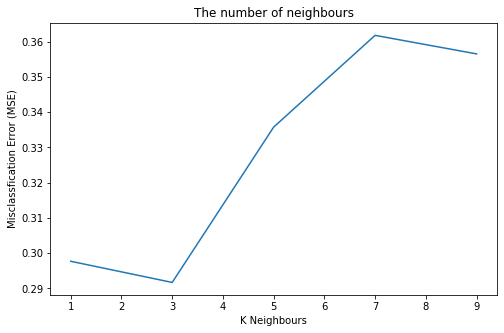

In [23]:
plt.figure(figsize = (8,5))
plt.title("The number of neighbours")
plt.xlabel("K Neighbours")
plt.ylabel("Misclassfication Error (MSE)")
plt.plot(K_values, MSE)
plt.show()


In [ ]:
df.scatter